- Business understanding – What does the business need?
- Data understanding – What data do we have / need? Is it clean?
- Data preparation – How do we organize the data for modeling?
- Modeling – What modeling techniques should we apply?
- Evaluation – Which model best meets the business objectives?

# 1. Business Understanding

In this project, we are trying to _assess the performance of different machine learning models_, to do so, those models should be able to predict whether a person has heart disease or not.

Thus, we'll be using mainly Python as our programming language and several libraries, to perform different tasks, such as:

* **Data Visualization**: Seaborn, Matplotlib, Graphviz, and yellowbrick;
* **Data Manipulation**: Pandas, and Numpy;
* **ML**: Scikit-Learn.

Although, there're a several Machine Learning type (Supervised, Unsupervised, and Reinforncement Learning), in this project we'll focus on Supervised Learning, and also use 3 difference algorithms: KNN, Decision Tree, and Logistic Regression.


In [1]:
# Importing Libraries

# Manipulation
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as gp
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import confusion_matrix as cm
from IPython.display import Image

# ML
import statsmodels.api as sm
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, mean_squared_error,roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV


# Setting Configs
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('ggplot')

# 2. Data Understanding


## Dataset Description 

This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

**The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.**

https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 2.1 Describe Data

As can be seen bellow our dataset have _1025 records_ and _14 features_.

### Attribute Information

- Age (age in years)
- Sex (1 = male; 0 = female)
- CP (chest pain type)
- TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
- CHOL (serum cholestoral in mg/dl)
- FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- RESTECH (resting electrocardiographic results)
- THALACH (maximum heart rate achieved)
- EXANG (exercise induced angina (1 = yes; 0 = no))
- OLDPEAK (ST depression induced by exercise relative to rest)
- SLOPE (the slope of the peak exercise ST segment)
- CA (number of major vessels (0-3) colored by flourosopy)
- THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
- TARGET (1 or 0)

In [2]:
# Loading Dataset
heart = pd.read_csv('./datasets/heart.csv')

# Inspecting Dataset
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.000,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.100,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.600,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.000,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.900,1,3,2,0


In [3]:
# Dataset info
print('#' * 50)
print('Total Rows:', heart.shape[0])
print('Total Columns:', heart.shape[1])
print('#' * 50, '\n')
heart.info(memory_usage=False)
print('\n')
print('#' * 50)

##################################################
Total Rows: 1025
Total Columns: 14
################################################## 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)

##################################################


In [4]:
#Descriptive Statistics
print('#' * 64)
print('Descriptive Statistics')
print('#' * 64)
heart.select_dtypes(exclude='object').describe()

################################################################
Descriptive Statistics
################################################################


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000,1025.000
mean,54.434,0.696,0.942,131.612,246.000,0.149,0.530,149.114,0.337,1.072,1.385,0.754,2.324,0.513
std,9.072,0.460,1.030,17.517,51.593,0.357,0.528,23.006,0.473,1.175,0.618,1.031,0.621,0.500
min,29.000,0.000,0.000,94.000,126.000,0.000,0.000,71.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,48.000,0.000,0.000,120.000,211.000,0.000,0.000,132.000,0.000,0.000,1.000,0.000,2.000,0.000
50%,56.000,1.000,1.000,130.000,240.000,0.000,1.000,152.000,0.000,0.800,1.000,0.000,2.000,1.000
75%,61.000,1.000,2.000,140.000,275.000,0.000,1.000,166.000,1.000,1.800,2.000,1.000,3.000,1.000
max,77.000,1.000,3.000,200.000,564.000,1.000,2.000,202.000,1.000,6.200,2.000,4.000,3.000,1.000


# 2.2 Data Quality

In this part, we'll be assessing the data quality of our dataset, looking for incorrect datatypes,NULL, missing and outliers values, in which, we should use an approach that benefit our analysis. 

### 2.2.1 Missing / NULL Values

We don't have neither null values nor missing values, but in case positive we could use two differnt approaches:

* remove whole record, in some cases this could lead to significant information loss.
* use a imputation method to substite the missing values of our dataset.




In [5]:
# Dataset info
print('#' * 35)
print('Checking NA Values ')
print('#' * 35)
print(heart.isna().sum())
print('#' * 35,)

###################################
Checking NA Values 
###################################
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
###################################


In [6]:
# Dataset info
print('#' * 35)
print('Checking NULL Values ')
print('#' * 35)
print(heart.isnull().sum())
print('#' * 35,)

###################################
Checking NULL Values 
###################################
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
###################################


In [7]:
# Fixing and inspecting datatypes
print('#' * 35)
print('Fixing Data Type')
print('#' * 35)
fix_dtype          = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
heart[fix_dtype]   = heart[fix_dtype].astype(object)
print(heart[fix_dtype].dtypes)
print('#' * 35)

###################################
Fixing Data Type
###################################
sex        object
cp         object
fbs        object
restecg    object
exang      object
slope      object
ca         object
thal       object
dtype: object
###################################


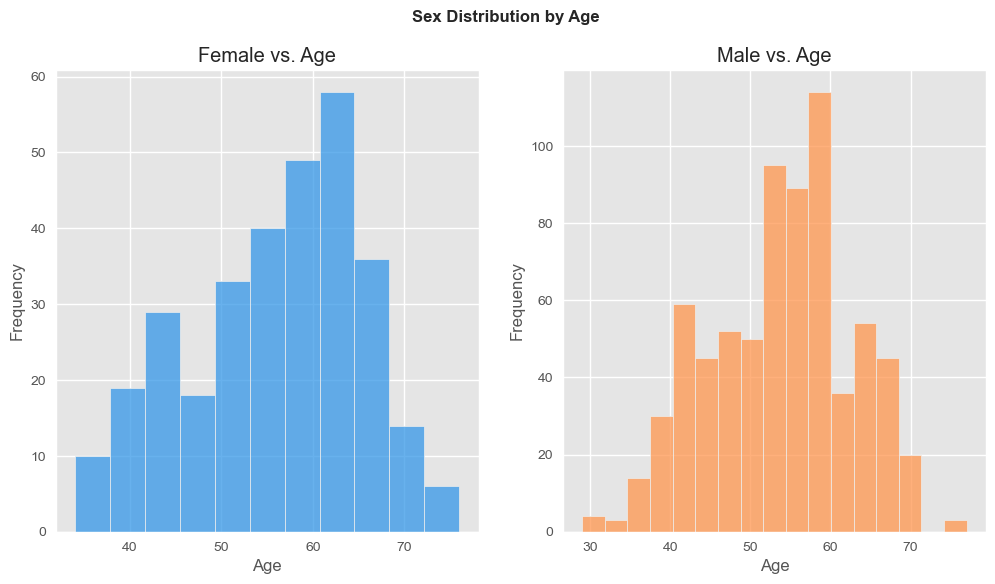

In [8]:
# Create histogram of Sex by Age
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
sns.histplot(data=heart[heart.sex == 0], x=heart.age[heart.sex == 0], color='#3597e8',label ='Female')
ax1.set_title('Female vs. Age')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Age')

ax2 = fig.add_subplot(1,2,2)
sns.histplot(data=heart[heart.sex == 1], x=heart.age[heart.sex == 1], color='#ff964f', label='Male')
ax2.set_title('Male vs. Age')
ax2.set_ylabel('Frequency')
ax2.set_xlabel('Age')

plt.suptitle('Sex Distribution by Age', fontweight='heavy', fontsize='12', fontfamily='sans-serif')
plt.show()

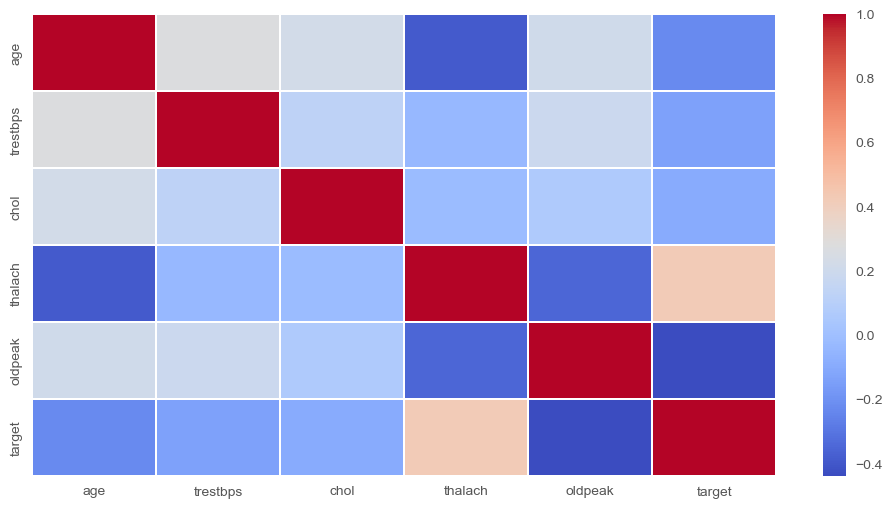

In [9]:
# Correlation between variables only non-categorial variables
plt.figure(figsize=(12,6))
sns.heatmap(heart.corr(), linewidth = 0.1, cmap='coolwarm');

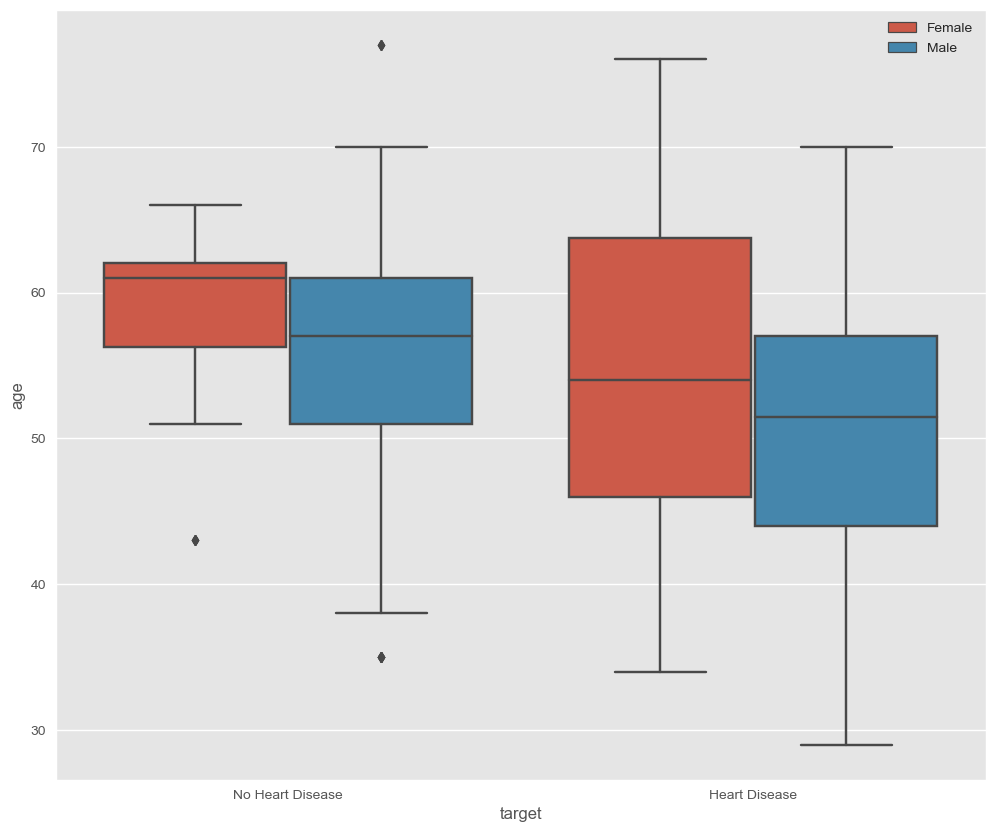

In [10]:
# Visualizing heart diasease against sex and age
plt.figure(figsize=(12,10))
ax = sns.boxplot(data=heart, x='target', y='age', hue='sex')
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Female", "Male"])
plt.show()

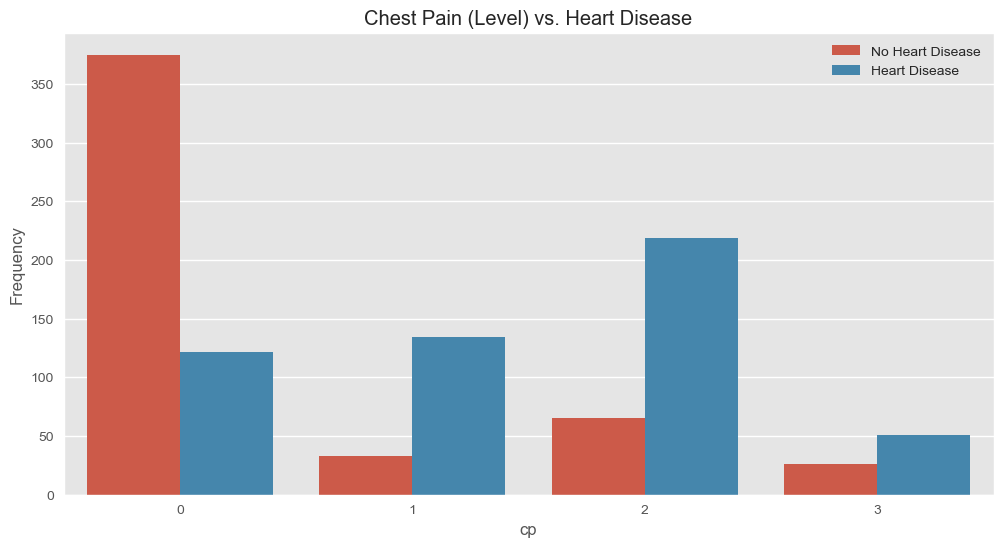

In [11]:
# Create histogram of Sex by Age
fig = plt.figure(figsize=(12, 6))

ax1 = sns.countplot(data=heart, x='cp', hue='target')
ax1.set_title('Chest Pain (Level) vs. Heart Disease')
ax1.set_ylabel('Frequency')
plt.legend(labels = ['No Heart Disease', 'Heart Disease']);


In [12]:
plt.figure(figsize=(15,10))
sns.pairplot(heart,hue="target")
plt.title("Looking for Insites in Data")
plt.legend(labels = ['No Heart Disease', 'Heart Disease'])
plt.tight_layout()
plt.show()

# 3 Data Preparation

In this part, we should clean and perform several processes in order to our dataset be clean and noiseless enough to help the machine learning methods perform well.

Thus, in our case we need to perform 4 tasks:

- **Label Encoding**: This is a process to convert all categorical variables to binary variable.
- **Drop Unnecessary Columns**:  As the process name, we'll get rid of useless columns.
- **Split our Data**: ML models, needs to learn from the data, and then test up unseen data.
- **Data Normalization**:  This process will be performed to normalize the range of independent variables or features of data.<br>.

In [ ]:
# One-Hot Enconding -> Label Encoding to turn Categorical values to Integers
# Dropping unecessary columns
df = pd.get_dummies(heart, columns=['cp', 'thal', 'slope'], drop_first=True)

# Inspecting new dataset
df.head()

In [ ]:
# Divide dataset in 2: Dependent (Target) variable and Independent Variables
X = df.loc[:, df.columns != 'target'].values

y = df.target.values

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1984)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# Inspecting X and y
print('X and y: ', X.shape, y.shape)
print('X and y train: ', X_train.shape, y_train.shape)
print('X and y test: ', X_test.shape, y_test.shape)

# Parameters for dataviz
fnames = df.loc[:, df.columns != 'target'].columns.to_list()
cnames = heart.target.unique().astype('str')


# 4. Modelling

# Logistic Regression

Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc.

Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical. Written like this:

P(Y=1|X) or P(Y=0|X)

It calculates the probability of dependent variable Y, given independent variable X.

This can be used to calculate the probability of a word having a positive or negative connotation (0, 1, or on a scale between). Or it can be used to determine the object contained in a photo (tree, flower, grass, etc.), with each object given a probability between 0 and 

In [ ]:
# Build the steps
steps = [('scaler', StandardScaler()),
         ('logreg', LogisticRegression())]
         
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print('Best score: ', cv.best_score_, "\nBest parameter: ", cv.best_params_)

# Make predictions
y_pred = cv.predict(X_test)

In [ ]:
# Compute R-squared
r_squared = cv.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

In [ ]:
lm_accuracy = round(accuracy_score(y_test, y_pred) * 100,2)
print('Logistic Regression Accuracy {}%'.format(lm_accuracy))

In [ ]:
roc_acc = round(roc_auc_score(y_test, y_pred) * 100,2)
print('Logistic ROC Accuracy {}%'.format(roc_acc))


In [ ]:
# Create histogram of Sex by Age
model = LogisticRegression()
fig = plt.figure(figsize=(12, 6))

ax1 = fig.add_subplot(1,2,1)
visualizer = ClassificationReport(model, cmap="GnBu",)
ax1.set_title('LogisticRegression Classification Report')

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
# visualizer.show();

ax2 = fig.add_subplot(1,2,2)
cm(model, X_train, y_train, X_test, y_test, classes=cnames, cmap="GnBu",)
plt.show();

# Decision Tree

A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar. This creates categories within categories, allowing for organic classification with limited human supervision.

In [ ]:
# Building Decision Treen Model
dtg = DecisionTreeClassifier(criterion='gini',max_depth=3)

# Train Decision Tree Classifer
dtg = dtg.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dtg.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test, y_pred))
gini_acc = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Tree Decision (Gini) Accuracy: {}%".format(gini_acc))

In [ ]:
# DOT data
dot_data = tree.export_graphviz(dtg, out_file=None, 
                                feature_names=fnames,  
                                class_names=cnames,
                                filled=True)

# Draw graph
graph = gp.Source(dot_data, format="png") 
graph

In [ ]:
fig = plt.subplots(figsize=(12, 8))


cm(DecisionTreeClassifier(criterion="gini", max_depth=3), X_train, y_train, X_test, y_test, classes=cnames, cmap="GnBu",)
plt.tight_layout();
# plt.show();

In [ ]:
# Create Decision Tree classifer object
dte = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
dte = dte.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = dte.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(classification_report(y_test, y_pred))
ent_acc = round(accuracy_score(y_test, y_pred) * 100, 2)

print("Tree Decision (Entropy) Accuracy: {}%".format(ent_acc))

In [ ]:
# DOT data
dot_data = tree.export_graphviz(dte, out_file=None, 
                                feature_names=fnames,  
                                class_names=cnames,
                                filled=True)

# Draw graph
graph = gp.Source(dot_data, format="png") 
graph

In [ ]:
# Instantiate the visualizer with the classification model

fig = plt.figure(figsize=(12, 8))

cm(dte,X_train, y_train, X_test, y_test,classes=cnames, cmap="GnBu",)
ax1.set_title('criterion="entropy"')

plt.show()

# KNN

The optimal K value usually found is the square root of N, where N is the total number of samples

K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples.

When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 40)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=neighbor)

    # Fit the classifier to the training data
    knn.fit(X_train_scaled, y_train)
    pred_i = knn.predict(X_test_scaled)

	# Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train_scaled, y_train)
    test_accuracies[neighbor] = knn.score(X_test_scaled, y_test)

In [ ]:
knn_train_acc = round(np.mean(list(train_accuracies.values())) *100,3)
knn_test_acc = round(np.mean(list(test_accuracies.values())) *100,3)
print("KNN (Train) Accuracy: {}%".format(knn_train_acc))
print("KNN (Test) Accuracy: {}%".format(knn_test_acc))

In [ ]:
# Add a title
fig = plt.figure(figsize=(12, 8))
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors,train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

In [ ]:
cm(
    KNeighborsClassifier(n_neighbors=25),
    X_train_scaled, y_train, X_test_scaled, y_test,
    classes=cnames,
 cmap="GnBu",)
plt.tight_layout()
plt.show();

In [ ]:
print(classification_report(y_test, y_pred))
knn_acc = round(accuracy_score(y_test, y_pred) * 100, 2)
print("KNN Accuracy: {}%".format(knn_acc))

# 5. Evaluation

In [ ]:
ml = pd.DataFrame({'Model': ['Logistic Regression', 'K-Nearest Neighbour', 'Decision Tree (Gini)', 'Decision Tree (Entropy)'], 
                    'Accuracy': [lm_accuracy, knn_acc, gini_acc, ent_acc]})
ml.head().sort_values(by='Accuracy', ascending=False)